https://github.com/ipazc/mtcnn

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 966 kB/s 


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from matplotlib import pyplot as plt
from mtcnn import MTCNN

In [3]:
img0=cv2.imread('../input/human-faces/Humans/1 (10).png')
img= cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

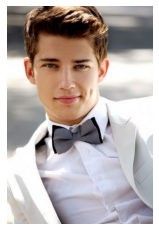

In [4]:
plt.imshow(img,cmap="gray")
plt.axis("off")  
plt.show()

# detector = MTCNN()

In [5]:
detector = MTCNN()

In [6]:
def mosaic(src, ratio=0.01):
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

def mtcnn_mosaic(image) : 
    result = detector.detect_faces(image)
    print(result)
    for face in zip(result):
        x,y,width,height=face[0]['box']
        mosaic_image=mosaic(image[y:(y+height),x:(x+width)])
        image[y:(y+height),x:(x+width)]=mosaic_image
    return image

In [7]:
imgMOS=mtcnn_mosaic(img)

[{'box': [191, 202, 469, 613], 'confidence': 0.9995461106300354, 'keypoints': {'left_eye': (323, 440), 'right_eye': (530, 440), 'nose': (442, 583), 'mouth_left': (343, 674), 'mouth_right': (530, 666)}}]


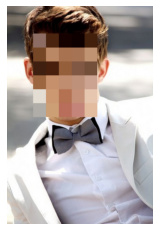

In [8]:
plt.imshow(imgMOS,cmap="gray")
plt.axis("off")  
plt.show()